Predicted Class: COVID


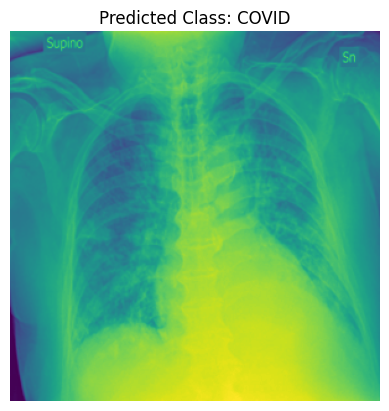

In [19]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 定义图像预处理操作
transform = transforms.Compose([
    transforms.Resize([224, 224]),  # 调整图像大小为 224x224
    transforms.ToTensor(),           # 将图像转换为 PyTorch 张量
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 对图像进行标准化
])

# 加载模型
class SimpleCNN(nn.Module):
    # 定义简单的模型，具体模型的含义可看训练部分
    def __init__(self, num_classes=4):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = SimpleCNN(num_classes=4)  # 创建模型实例
model.load_state_dict(torch.load(r"model_pth\bets.pth"))  # 加载模型权重
model.eval()  # 设置模型为评估模式

# 定义类别标签
class_names = ["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

# 图像分类推理函数
def predict_image(image_path):
    # 加载图像并进行预处理
    image = Image.open(image_path)
    image = image.convert("RGB")  # 将图像转换为 RGB 彩色图
    image = transform(image)  # 转换图像为张量形状
    image = image.unsqueeze(0)  # 添加一个维度，变成形状为 [1, 3, 224, 224] 的张量
    
    # 在推理过程中，使用 torch.no_grad() 上下文管理器，以停止梯度计算，因为在推理时不需要计算梯度。
    # 将图像输入模型，获取模型的输出
    with torch.no_grad():
        outputs = model(image)  # 将图像传递给模型进行推理，得到输出
        _, predicted = torch.max(outputs, 1)  # 从输出中获取预测类别
        class_idx = predicted.item()  # 获取预测类别的索引
        class_label = class_names[class_idx]  # 根据索引获取预测类别的标签
    # 返回预测的类别标签
    return class_label

# 加载并预测图像
image_path = r"new_COVID_19_Radiography_Dataset\test\COVID\images\COVID-10.png" # 可以换其他类别的数据集
predicted_class = predict_image(image_path)
print("Predicted Class:", predicted_class)

# 可视化图像
image = Image.open(image_path)
plt.imshow(image)
plt.title("Predicted Class: " + predicted_class)
plt.axis("off")
plt.show()
